In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
DF_Spotify = pd.read_csv('Spotify.csv')

In [4]:
DF_Spotify.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
DF_Spotify.shape

(232725, 18)

In [6]:
DF_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [7]:
DF_Spotify.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [8]:
DF_Spotify.drop(DF_Spotify.columns[[0,1,2,3,7,-2,-5,-8]],axis= 1, inplace = True)

In [9]:
DF_Spotify.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.611,0.389,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,1,0.246,0.590,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,3,0.952,0.663,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,0,0.703,0.240,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,4,0.950,0.331,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


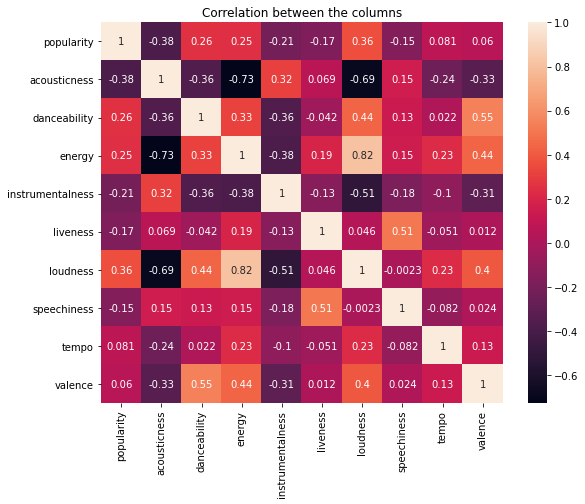

In [10]:
plt.figure(figsize=(9,7))
sns.heatmap(DF_Spotify.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [12]:
WSS=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(DF_Spotify)
    WSS.append(kmeans.inertia_)

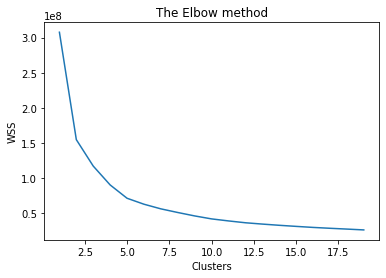

In [13]:
plt.plot(range(1,20), WSS)
plt.title('The Elbow method')
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.show()

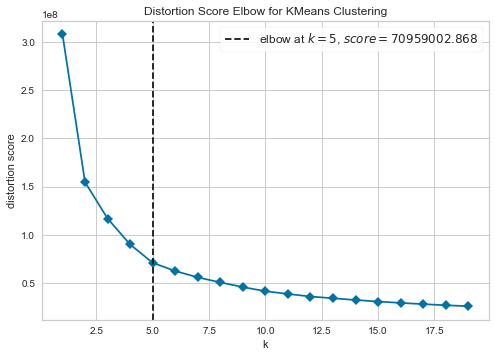

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20), timings = False)
visualizer.fit(DF_Spotify)
visualizer.show()

In [15]:
pca = PCA()
Y = pca.fit_transform(DF_Spotify)

In [16]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(Y)
unique_labels = np.unique(label)

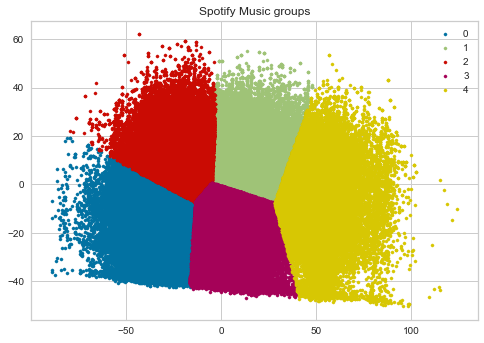

In [19]:
for i in unique_labels:
    plt.scatter(Y[label==i,0], Y[label==i,1], label=i, s=10)
    
plt.legend()
plt.title('Spotify Music groups')
plt.show()
